# Bool
закодировать
# Questions
result_name оставить нул?

# Импорт основных библиотек и датасета

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# graph
import networkx as nx
from pyvis.network import Network

In [2]:
PATHES = ["./with_closed_ations_as________select_app_2018_X5_STORES.csv", "./with_closed_ations_as________select_app_2019_X5_STORES.csv", "./with_closed_ations_as________select_app_2020_X5_STORES.csv"]
# df = pd.read_csv(PATH)
df = pd.DataFrame()
for path in PATHES:
    df1 = pd.read_csv(path)
    df = pd.concat([df, df1])
    
df['action_date'] = pd.to_datetime(df['action_date'])
df = df[df['position_name'] == 'Продавец-кассир']

C:\Users\Dmitry\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# изменение bool значений

In [3]:
df["is_active_action"] = df.is_active_action.replace({True: 1, False: 0})
df["is_open_action"] = df.is_open_action.replace({True: 1, False: 0})
df

,id_applicant,id_partner,id_log,department_id,action_date,stage_name,activity_name,result_name,position_name,is_active_action,is_open_action
0,3080432,2883423,-1,9044,2018-10-16 18:11:10.003180+00:00,Создание кандидата,NaN,NaN,Продавец-кассир,1,0
1,2873477,2761171,-1,32087,2018-08-15 10:36:32.936322+00:00,Создание кандидата,NaN,NaN,Продавец-кассир,1,0
2,2896621,2776555,-1,32087,2018-08-22 14:09:27.083354+00:00,Создание кандидата,NaN,NaN,Продавец-кассир,1,0
3,2906437,2782282,-1,32087,2018-08-24 15:55:27.912704+00:00,Создание кандидата,NaN,NaN,Продавец-кассир,1,0
4,2965200,2816229,-1,32087,2018-09-11 15:00:49.242929+00:00,Создание кандидата,NaN,NaN,Продавец-кассир,1,0
...,...,...,...,...,...,...,...,...,...,...,...
739675,4825142,2952699,-1,32061,2020-04-23 16:26:11.809180+00:00,Не прошел СБ,Вывести из черного списка,NaN,Продавец-кассир,1,1
739676,4736341,936507,-1,32061,2020-04-23 16:26:11.809180+00:00,Не прошел СБ,Вывести из черного списка,NaN,Продавец-кассир,1,1
739678,4782853,2753502,-1,32110,2020-04-23 16:26:11.809180+00:00,Не прошел СБ,Вывести из черного списка,NaN,Продавец-кассир,1,1
739679,4769924,3823657,-1,32110,2020-04-23 16:26:11.809180+00:00,Не прошел СБ,Вывести из черного списка,NaN,Продавец-кассир,1,1


# Статистика

In [4]:
df = df[df['is_active_action'] == 1]

In [5]:
# Сортируем по аппликантам и по времени
df.sort_values(by=['id_applicant','action_date'], ascending = [False,True], inplace = True)
df.reset_index(drop = True, inplace = True)

# action_time
indexes = pd.RangeIndex(len(df) - 1)
df['action_time'] = (df.iloc[indexes + 1]['action_date'].reset_index(drop = True) - df['action_date']).dt.total_seconds()/60/60/24 # In days
df['action_time'].iloc[df[df['id_applicant'] !=  df.iloc[indexes+1].append({'id_applicant': 0}, ignore_index = True)['id_applicant'].reset_index(drop = True)].index] = None

C:\Users\Dmitry\AppData\Roaming\Python\Python37\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\Dmitry\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Dmitry\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [6]:
# df.iloc[df[(df['result_name']=='Принят') & (df['action_time'].notna())].index]
# & (df['stage_name']=='Оформление'

In [7]:
df['is_fits'] = 0
df.loc[df['result_name'] == 'Принят', 'is_fits'] = 1
df['is_fits'].mean()

C:\Users\Dmitry\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dmitry\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


0.018807529887609212

In [8]:
applicants_fits =  df.groupby(['id_applicant'])['is_fits'].sum()
applicants_fits.describe()

count    1.733977e+06
mean     1.161053e-01
std      3.206698e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.000000e+00
Name: is_fits, dtype: float64

In [9]:
df['id_applicant'][df['id_applicant'].isin(applicants_fits[applicants_fits > 2].index)].unique()
# Очень странные значения!!! Когда два раза принимают там в основном второе оформление - после выхода на работу
# Можете смотреть тут
# df[df['id_applicant'].isin([4041842])]

array([2859958], dtype=int64)

In [170]:
df_fits = df[df['id_applicant'].isin(applicants_fits[applicants_fits > 0].index)].reset_index()
df_fits = df_fits[df_fits['is_active_action'] == 1]
df_fits.describe()

,index,id_applicant,id_partner,id_log,department_id,is_active_action,is_open_action,action_time,is_fits
count,2.400247e+06,2.400247e+06,2.400247e+06,2.400247e+06,2.400247e+06,2400247.0,2.400247e+06,2.199099e+06,2.400247e+06
mean,5.329407e+06,3.280235e+06,2.709437e+06,1.577098e+07,2.203810e+04,1.0,6.249357e-06,1.191580e+00,8.387637e-02
std,2.899277e+06,6.037361e+05,6.683275e+05,5.887423e+06,1.214382e+04,0.0,2.499864e-03,7.970328e+00,2.772024e-01
min,0.000000e+00,2.196746e+06,5.305870e+05,-1.000000e+00,5.637000e+03,1.0,0.000000e+00,1.396991e-08,0.000000e+00
25%,2.808272e+06,2.775263e+06,2.497976e+06,1.347877e+07,1.008500e+04,1.0,0.000000e+00,1.080026e-05,0.000000e+00
50%,5.312441e+06,3.290447e+06,2.818420e+06,1.643617e+07,2.406800e+04,1.0,0.000000e+00,9.651384e-05,0.000000e+00
75%,7.814420e+06,3.759099e+06,3.181783e+06,1.967039e+07,3.217700e+04,1.0,0.000000e+00,7.662988e-01,0.000000e+00
max,1.070443e+07,4.886615e+06,3.897229e+06,2.710603e+07,4.985900e+04,1.0,1.000000e+00,8.111587e+02,1.000000e+00


In [171]:
len(df_fits['id_applicant'].unique())

201148

In [172]:
df_fits['Date_int'] = df_fits['action_date'].values.astype('int64')
partner_applicant =  df_fits.groupby(['id_partner','id_applicant'])['Date_int'].max().reset_index()
amount_applicant =  partner_applicant.groupby(['id_partner'])['Date_int'].max().reset_index()
partner_applicant = partner_applicant[partner_applicant['Date_int'].isin(amount_applicant['Date_int'])]

df_fits = df_fits[df_fits['id_applicant'].isin(partner_applicant['id_applicant'])].reset_index(drop = True)

In [174]:
len(df_fits['id_applicant'].unique())

193767

In [173]:
applicant_min =  df_fits.groupby(['id_applicant'])['action_date'].min().reset_index()
fits_min =  df_fits[df_fits['result_name'] == 'Принят'].groupby(['id_applicant'])['action_date'].min().reset_index()

# unused for now
# new_tth = pd.DataFrame(applicant_min).drop(columns = 'action_date')
# new_tth['tth'] = (fits_min['action_date'] - applicant_min['action_date']).dt.total_seconds()/60/60/24

In [177]:
df_fits.loc[df_fits['action_date'].isin(fits_min['action_date']) & (df_fits['action_time'].notna()), 'after_fit'] = 1
while True:
    after_indexes = df_fits[(df_fits['action_time'].notna())& (df_fits['after_fit'] == 1)].index
    after_fit_mask = (df_fits.index.isin(after_indexes + 1) & (df_fits['action_time'].notna())) & df_fits['after_fit'].isna()
    print(len(df_fits.loc[after_fit_mask]))
    if len(df_fits.loc[after_fit_mask]) == 0:
        break
    df_fits.loc[after_fit_mask, 'after_fit'] = 1

357
243
207
191
175
167
82
34
24
18
15
15
11
10
1
0


In [175]:
# partner_applicant =  df_fits.groupby(['id_partner','id_applicant']).size().reset_index()
# amount_applicant =  partner_applicant.groupby(['id_partner'])['id_applicant'].count().reset_index()
# partner_applicant.set_index('id_partner', inplace = True)
# amount_applicant[amount_applicant['id_applicant']>2]

# amount_applicant['id_partner'][amount_applicant['id_applicant']>2].array

In [103]:
# df_fits.loc[df_fits.index.isin(after_indexes + 1) & (df_fits['action_time'].notna()),'after_fit'] = 1
# ['after_fit']

In [180]:
df_fits.loc[df_fits['after_fit'] == 1, 'action_time'] = 0

In [181]:
df_fits[df_fits['id_applicant']== 2304085]

,index,id_applicant,id_partner,id_log,department_id,action_date,stage_name,activity_name,result_name,position_name,is_active_action,is_open_action,action_time,is_fits,Date_int,after_fit
2236694,10182374,2304085,2450166,-1,7669,2018-02-07 12:07:49.943727+00:00,Создание кандидата,NaN,NaN,Продавец-кассир,1,0,0.000243,0,1518005269943727000,NaN
2236695,10182375,2304085,2450166,11446392,7669,2018-02-07 12:08:10.921788+00:00,Обработка,Провести первичную обработку,Подходит,Продавец-кассир,1,0,0.000007,0,1518005290921788000,NaN
2236696,10182376,2304085,2450166,11446393,7669,2018-02-07 12:08:11.530901+00:00,Интервью с руководителем,Назначить интервью с руководителем,Встреча назначена,Продавец-кассир,1,0,0.000008,0,1518005291530901000,NaN
2236697,10182377,2304085,2450166,11446395,7669,2018-02-07 12:08:12.222999+00:00,Интервью с руководителем,Узнать результаты интервью с руководителем,Подходит,Продавец-кассир,1,0,0.000007,0,1518005292222999000,NaN
2236698,10182378,2304085,2450166,11446396,7669,2018-02-07 12:08:12.833310+00:00,СБ,Подготовить анкету кандидата,Подготовлена,Продавец-кассир,1,0,1.169736,0,1518005292833310000,NaN
2236699,10182379,2304085,2450166,11482988,7669,2018-02-08 16:12:38.018049+00:00,СБ,Узнать результаты СБ,Подходит,Продавец-кассир,1,0,0.743676,0,1518106358018049000,NaN
2236700,10182380,2304085,2450166,11492625,7669,2018-02-09 10:03:31.654279+00:00,Назначение времени на оформление/медосмотр,Назначить время на оформление/медосмотр,Время назначено,Продавец-кассир,1,0,0.000045,0,1518170611654279000,NaN
2236701,10182381,2304085,2450166,11492633,7669,2018-02-09 10:03:35.512896+00:00,Оформление,Узнать результаты приема,Принят,Продавец-кассир,1,0,0.000000,1,1518170615512896000,1.0
2236702,10182382,2304085,2450166,11492761,7669,2018-02-09 10:05:09.963033+00:00,Выход на работу,NaN,Недозвон,Продавец-кассир,1,0,0.000000,0,1518170709963033000,1.0
2236703,10182383,2304085,2450166,11608441,7669,2018-02-15 15:45:12.939423+00:00,Назначение времени на оформление/медосмотр,Назначить время на оформление/медосмотр (недоз...,Время назначено,Продавец-кассир,1,0,0.000000,0,1518709512939423000,1.0


In [182]:
applicants_g =  df_fits.dropna(subset=['action_time']).groupby(['id_applicant'])['action_time'].sum()
applicants_g.describe()

count    193767.000000
mean         13.002689
std          26.227052
min           0.000000
25%           4.303064
50%           7.925007
75%          14.193260
max         811.159243
Name: action_time, dtype: float64

In [31]:
# applicants_g =  df_fits.dropna(subset=['action_time']).groupby(['id_applicant'])['action_time', 'is_fits'].sum()
# applicants_g[applicants_g['is_fits']>0].describe()

In [32]:
# applicants_g[applicants_g['is_fits']==0].describe()

In [191]:
# df['action_time'][df['action_time'] < 0] = None
stage_threshold = 0
stages_g =  df_fits.dropna(subset=['action_time']).groupby(['stage_name'])['action_time'].describe() # ['stage_name', 'activity_name']
stages_g[stages_g['count'] > stage_threshold]

,count,mean,std,min,25%,50%,75%,max
stage_name,,,,,,,,
Выход на работу,156.0,7.653954e-07,0.000010,0.000000,0.000000,0.000000,0.000000,0.000119
Гайд-интервью,4.0,1.095294e-05,0.000002,0.000009,0.000010,0.000011,0.000012,0.000013
Групповое собеседование и тестирование,6.0,1.032205e-05,0.000002,0.000007,0.000009,0.000010,0.000012,0.000013
Интервью с руководителем,470750.0,5.638600e-01,9.275355,0.000000,0.000008,0.000011,0.000015,811.158711
Кадровый резерв,4.0,1.344234e-05,0.000011,0.000007,0.000008,0.000009,0.000014,0.000030
Мы отказали,22.0,3.087409e-01,1.448064,0.000006,0.000008,0.000012,0.000015,6.792035
Назначение времени на оформление/медосмотр,205262.0,2.588323e+00,6.867795,0.000000,0.000112,0.815544,3.013467,433.256890
Не прошел СБ,382.0,2.270939e-02,0.211153,0.000000,0.000009,0.000011,0.000014,3.742623
Обработка,348531.0,1.721927e-01,6.452844,0.000000,0.000009,0.000011,0.000014,565.056308


In [192]:
activity_threshold = 0
activities_g =  df_fits.dropna(subset=['action_time']).groupby(['activity_name'])['action_time'].describe()
activities_g[activities_g['count'] > activity_threshold]

,count,mean,std,min,25%,50%,75%,max
activity_name,,,,,,,,
Вернуть в воронку,8777.0,0.242731,2.267561e+00,0.000000,0.000062,0.000159,0.000346,113.246137
Вывести из черного списка,5.0,0.000208,1.429926e-04,0.000006,0.000114,0.000274,0.000297,0.000349
Назначить время для гайд-интервью,2.0,0.000012,7.476836e-07,0.000012,0.000012,0.000012,0.000012,0.000013
Назначить время на оформление,8211.0,1.034397,1.984597e+00,0.000022,0.000065,0.000233,1.043698,18.966384
Назначить время на оформление/медосмотр,218463.0,2.241596,5.549622e+00,0.000000,0.000132,0.226701,2.831785,433.256890
Назначить время на оформление/медосмотр (недозвон),124348.0,2.979159,7.469302e+00,0.000000,0.000076,0.828471,3.230560,392.058357
Назначить групповое собеседование и тестирование,2.0,0.000008,1.037589e-06,0.000007,0.000008,0.000008,0.000008,0.000009
Назначить интервью с руководителем,225710.0,0.626633,9.179090e+00,0.000000,0.000009,0.000011,0.000015,811.158711
Подготовить анкету кандидата,220390.0,1.376634,1.224314e+01,0.000000,0.000013,0.175958,0.832847,527.944208


In [193]:
result_threshold = 0
results_g =  df_fits.dropna(subset=['action_time']).groupby(['result_name'])['action_time'].describe()
results_g[results_g['mean'] > 1]

,count,mean,std,min,25%,50%,75%,max
result_name,,,,,,,,
В ожидании,153482.0,3.156915,5.907434,0.000000,1.016037,1.917958,3.893890,520.710384
Время назначено,191517.0,1.840531,4.353374,0.000000,0.000073,0.000275,2.811422,291.880512
Кадровый резерв,197.0,1.882064,7.805397,0.000008,0.000009,0.000011,0.000013,72.072166
Направлен на медосмотр,7438.0,4.059084,6.214250,0.000035,1.740861,2.116287,4.021579,148.137375
Не подходит,454.0,30.964834,49.379058,0.000000,9.190021,17.501866,32.610084,467.791808
Не получено,24.0,1.907678,2.560172,0.007971,0.077342,0.760203,2.788345,9.012896
Не принят,14.0,25.042870,38.841320,0.000000,7.308831,13.095907,28.450503,154.034348
Недозвон,143693.0,3.379865,9.124103,0.000000,0.248853,1.027104,3.153146,561.365339
Нет обратной связи,22849.0,3.343555,20.052145,0.000000,0.176479,0.923801,1.996707,532.894660


# Обнуляем время в результатах без предсказуемой последующей обработки

In [221]:
# Недозвон? Нет обратной связи? Ожидание?
results_empty = ['Резерв', 'Не подходит', 'Не принят', 'Отказ кандидата', 'Отказ руководителя', 'Принят', 'Резерв', 'Кадровый резерв']
for res in results_empty:
    df_fits.loc[(df_fits['result_name'] == res) & df_fits['action_time'].notna(), 'action_time'] = 0
    
df_fits.loc[(df_fits['stage_name'] == 'Создание кандидата') & df_fits['action_time'].notna(), 'action_time'] = 0

In [222]:
stages_g =  df_fits.dropna(subset=['action_time']).groupby(['stage_name'])['action_time'].describe() # ['stage_name', 'activity_name']
stages_g

,count,mean,std,min,25%,50%,75%,max
stage_name,,,,,,,,
Выход на работу,156.0,7.653954e-07,0.000010,0.000000,0.000000,0.000000,0.000000,0.000119
Гайд-интервью,4.0,1.095294e-05,0.000002,0.000009,0.000010,0.000011,0.000012,0.000013
Групповое собеседование и тестирование,6.0,1.032205e-05,0.000002,0.000007,0.000009,0.000010,0.000012,0.000013
Интервью с руководителем,470750.0,5.541007e-01,9.122335,0.000000,0.000008,0.000011,0.000015,618.209540
Кадровый резерв,4.0,1.344234e-05,0.000011,0.000007,0.000008,0.000009,0.000014,0.000030
Мы отказали,22.0,3.087409e-01,1.448064,0.000006,0.000008,0.000012,0.000015,6.792035
Назначение времени на оформление/медосмотр,205262.0,2.537721e+00,6.628267,0.000000,0.000106,0.803009,2.998235,430.056809
Не прошел СБ,382.0,2.270939e-02,0.211153,0.000000,0.000009,0.000011,0.000014,3.742623
Обработка,348531.0,1.635083e-01,6.332038,0.000000,0.000009,0.000011,0.000014,565.056308


In [225]:
results_g =  df_fits.dropna(subset=['action_time']).groupby(['result_name'])['action_time'].describe()
# results_g
results_g

,count,mean,std,min,25%,50%,75%,max
result_name,,,,,,,,
В белый список,4.0,0.000259,0.000101,0.000114,0.000234,0.000286,0.000310,0.000349
В ожидании,153482.0,3.156915,5.907434,0.000000,1.016037,1.917958,3.893890,520.710384
Время назначено,191517.0,1.840531,4.353374,0.000000,0.000073,0.000275,2.811422,291.880512
Встреча назначена,224659.0,0.594591,8.826268,0.000000,0.000009,0.000011,0.000015,600.796568
Интервью с руководителем,482.0,0.507145,5.623006,0.000016,0.000107,0.000176,0.000488,113.246137
Источник Яндекс Цифра,27.0,0.496732,1.423606,0.000011,0.000198,0.034347,0.086146,7.030999
Источник не Яндекс Цифра,45338.0,0.144579,5.950515,0.000000,0.000011,0.000013,0.000017,469.080663
Кадровый резерв,197.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Назначить время на оформление/медосмотр,3179.0,0.302307,2.244807,0.000000,0.000129,0.000187,0.000383,38.193814


In [226]:
activities_g =  df_fits.dropna(subset=['action_time']).groupby(['activity_name'])['action_time'].describe()
activities_g

,count,mean,std,min,25%,50%,75%,max
activity_name,,,,,,,,
Вернуть в воронку,8777.0,0.242731,2.267561e+00,0.000000,0.000062,0.000159,0.000346,113.246137
Вывести из черного списка,5.0,0.000208,1.429926e-04,0.000006,0.000114,0.000274,0.000297,0.000349
Назначить время для гайд-интервью,2.0,0.000012,7.476836e-07,0.000012,0.000012,0.000012,0.000012,0.000013
Назначить время на оформление,8211.0,1.034397,1.984597e+00,0.000000,0.000065,0.000233,1.043698,18.966384
Назначить время на оформление/медосмотр,218463.0,2.228330,5.390592e+00,0.000000,0.000131,0.220907,2.827073,430.056809
Назначить время на оформление/медосмотр (недозвон),124348.0,2.915568,7.302224e+00,0.000000,0.000071,0.809476,3.173901,392.058357
Назначить групповое собеседование и тестирование,2.0,0.000008,1.037589e-06,0.000007,0.000008,0.000008,0.000008,0.000009
Назначить интервью с руководителем,225710.0,0.617503,8.965768e+00,0.000000,0.000009,0.000011,0.000015,600.796568
Подготовить анкету кандидата,220390.0,1.376634,1.224314e+01,0.000000,0.000013,0.175958,0.832847,527.944208


In [227]:
df_tth =  df_fits.dropna(subset=['action_time']).groupby(['id_applicant'])['action_time'].sum().reset_index()
df_tth.rename(columns={"action_time": "TTH"}, inplace = True)
df_tth.describe()

,id_applicant,TTH
count,1.937670e+05,193767.000000
mean,3.253116e+06,12.246941
std,6.243072e+05,24.546035
min,2.196746e+06,0.000000
25%,2.730766e+06,4.043818
50%,3.192514e+06,7.500264
75%,3.740477e+06,13.962910
max,4.886615e+06,626.053685


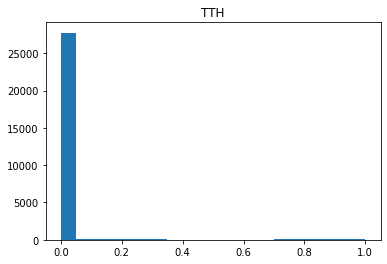

In [260]:
fig, ax = plt.subplots(1, 1)
bins = 20
ax.hist(df_tth['TTH'][(df_tth['TTH']<1)],bins=bins)
ax.set_title("TTH")
plt.show()

In [259]:
df_tth['TTH'][(df_tth['TTH']<1)].describe()

count    28931.000000
mean         0.022183
std          0.126728
min          0.000000
25%          0.000113
50%          0.000149
75%          0.000244
max          0.999983
Name: TTH, dtype: float64

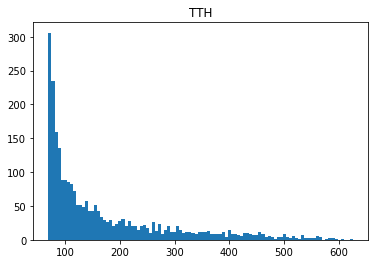

In [239]:
fig, ax = plt.subplots(1, 1)
ax.hist(df_tth['TTH'][(df_tth['TTH']<5000)&(df_tth['TTH']>69)],bins=100)
ax.set_title("TTH")
plt.show()

In [229]:
df_fits

,index,id_applicant,id_partner,id_log,department_id,action_date,stage_name,activity_name,result_name,position_name,is_active_action,is_open_action,action_time,is_fits,Date_int,after_fit
0,0,4886615,1040329,-1,27473,2020-04-14 11:08:56.073512+00:00,Создание кандидата,NaN,NaN,Продавец-кассир,1,0,0.000000,0,1586862536073512000,NaN
1,1,4886615,1040329,27106021,27473,2020-04-14 11:09:09.164995+00:00,Обработка,Провести первичную обработку,Подходит,Продавец-кассир,1,0,0.000015,0,1586862549164995000,NaN
2,2,4886615,1040329,27106023,27473,2020-04-14 11:09:10.460392+00:00,Обработка,Проверка формы обращения,Не резерв,Продавец-кассир,1,0,0.000017,0,1586862550460392000,NaN
3,3,4886615,1040329,27106025,27473,2020-04-14 11:09:11.898599+00:00,Интервью с руководителем,Назначить интервью с руководителем,Встреча назначена,Продавец-кассир,1,0,0.000014,0,1586862551898599000,NaN
4,4,4886615,1040329,27106027,27473,2020-04-14 11:09:13.091460+00:00,Интервью с руководителем,Узнать результаты интервью с руководителем,Подходит,Продавец-кассир,1,0,0.000014,0,1586862553091460000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2318758,10704425,2196746,2393754,10894251,6715,2018-01-09 09:27:48.426849+00:00,Назначение времени на оформление/медосмотр,Назначить время на оформление/медосмотр,Время назначено,Продавец-кассир,1,0,7.332564,0,1515490068426849000,NaN
2318759,10704426,2196746,2393754,11063771,6715,2018-01-16 17:26:41.952795+00:00,Оформление,Узнать результаты приема,В ожидании,Продавец-кассир,1,0,2.021458,0,1516123601952795000,NaN
2318760,10704427,2196746,2393754,11114834,6715,2018-01-18 17:57:35.949129+00:00,Оформление,Узнать результаты приема,В ожидании,Продавец-кассир,1,0,7.920533,0,1516298255949129000,NaN
2318761,10704428,2196746,2393754,11256014,6715,2018-01-26 16:03:09.962365+00:00,Оформление,Узнать результаты приема,В ожидании,Продавец-кассир,1,0,6.292864,0,1516982589962365000,NaN


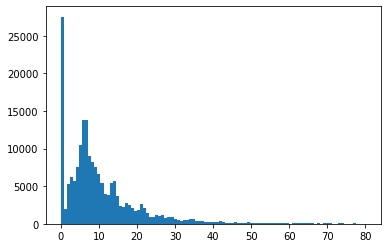

In [230]:
fig, ax = plt.subplots(1,1)
ax.hist(df_tth['TTH'][(df_tth['TTH']<70)& (df_tth['TTH']>0)], bins = 100)
plt.show()

In [231]:
df_fits['action_time'].quantile(.999)

68.2677492796434

In [232]:
df_tth['TTH'][df_tth['TTH']>100]

78        473.820724
129       134.243540
174       533.154021
187       370.023845
312       173.923378
             ...    
149411    100.938892
150358    105.030456
151363    106.354237
151727    106.162903
153141    112.194402
Name: TTH, Length: 1551, dtype: float64

In [233]:
# stage_name = 'Интервью с руководителем'
# stage_series = df_fits['action_time'][df_fits['stage_name'] == stage_name]
# time_threshold = stages_g.loc[stage_name]['75%']

# df.iloc[stage_series[stage_series.values > time_threshold].index]

In [234]:
# amount_applicant =  df_fits.groupby(['id_partner','id_applicant']).size().reset_index()
# amount_applicant =  amount_applicant.groupby(['id_partner'])['id_applicant'].count().reset_index()
# amount_applicant[amount_applicant['id_applicant']>3]

In [235]:
# df.iloc[df[df['stage_name'] == 'Групповое собеседование и тестирование'].index+1]
# print(len(stages[stages['count'] > stage_threshold]))
# df.iloc[df[df['action_time'] < 0].index + 1]
# df[df['activity_name'] == 'Провести первичную обработку']

In [236]:
import matplotlib.pyplot as plt

def showHist(data, grouped_data, column_name = 'stage_name', col_threshold = 0, is_special = True, xy = 4):
    
    fig, axs = plt.subplots(xy, xy, figsize=(20,15))
    i = 0
    not_special_const = 5
    
    for col in data[column_name].unique():
        series = data['action_time'][data[column_name] == col]
        time_threshold = not_special_const
        if is_special and col in grouped_data.index:
            time_threshold = grouped_data.loc[col]['75%']
        col_len = len(series)
    
        if col_len > col_threshold:
            x, y =divmod(i, xy)
            i+=1
#             axs[x,y].set_ylabel('Кол-во')
            axs[x,y].set_xlabel(f'{col}, {col_len}')
            series[series.values < time_threshold].hist(ax=axs[x,y],bins=100)
        print('.', end = '')
    plt.show()

def checkShowHist(data, grouped_data, column_name = 'stage_name', col_threshold = 0, is_special = True, xy = 4):
    
    not_special_const = 5
    if is_special and len(data[column_name].unique()) != len(grouped_data):
        print('Not all columns in grouped_data')
    
    i = 0
    for col in data[column_name].unique():
        series = data['action_time'][data[column_name] == col]
        col_len = len(series)
    
        if col_len > col_threshold:
            x, y =divmod(i, xy)
            if x > xy or y > xy:
                print(f'Too many columns in data for diagramm {xy}*{xy}')                
            i+=1

................

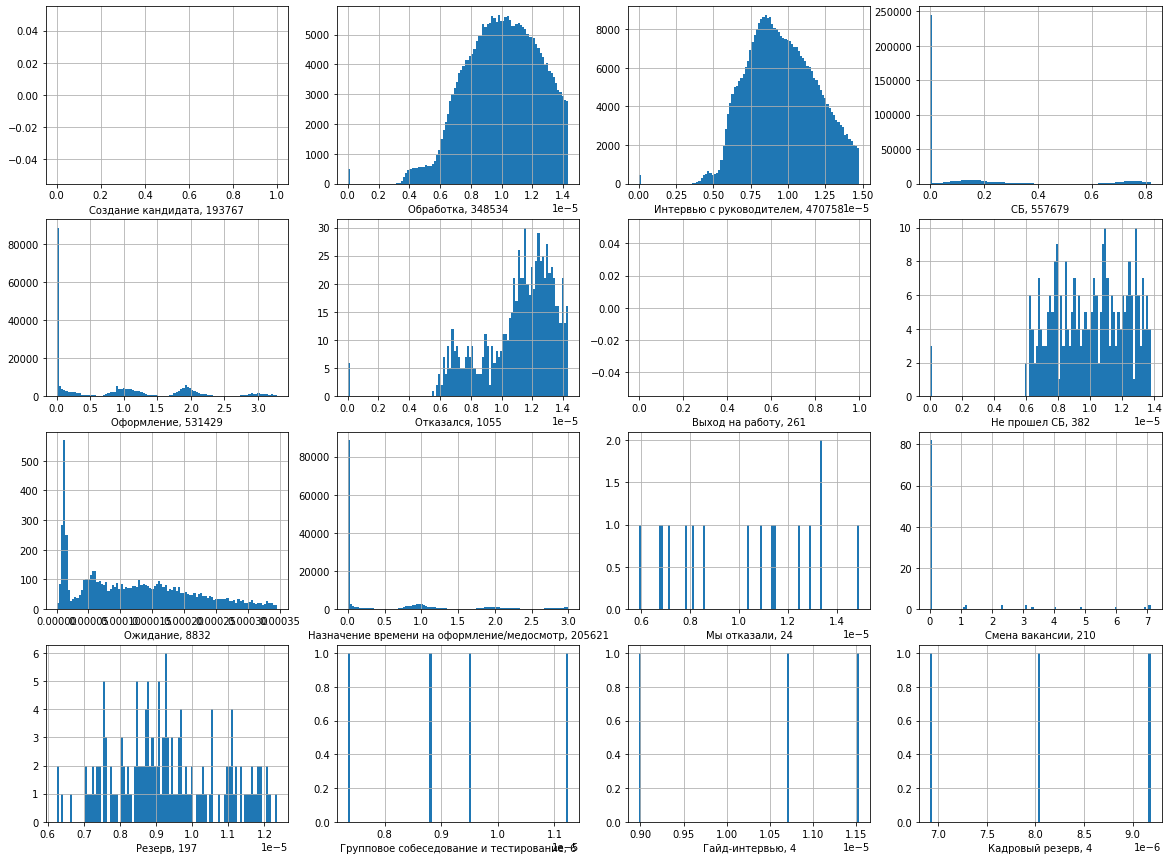

In [237]:
showHist(df_fits, stages_g, 'stage_name', stage_threshold)

.................

IndexError: index 4 is out of bounds for axis 0 with size 4

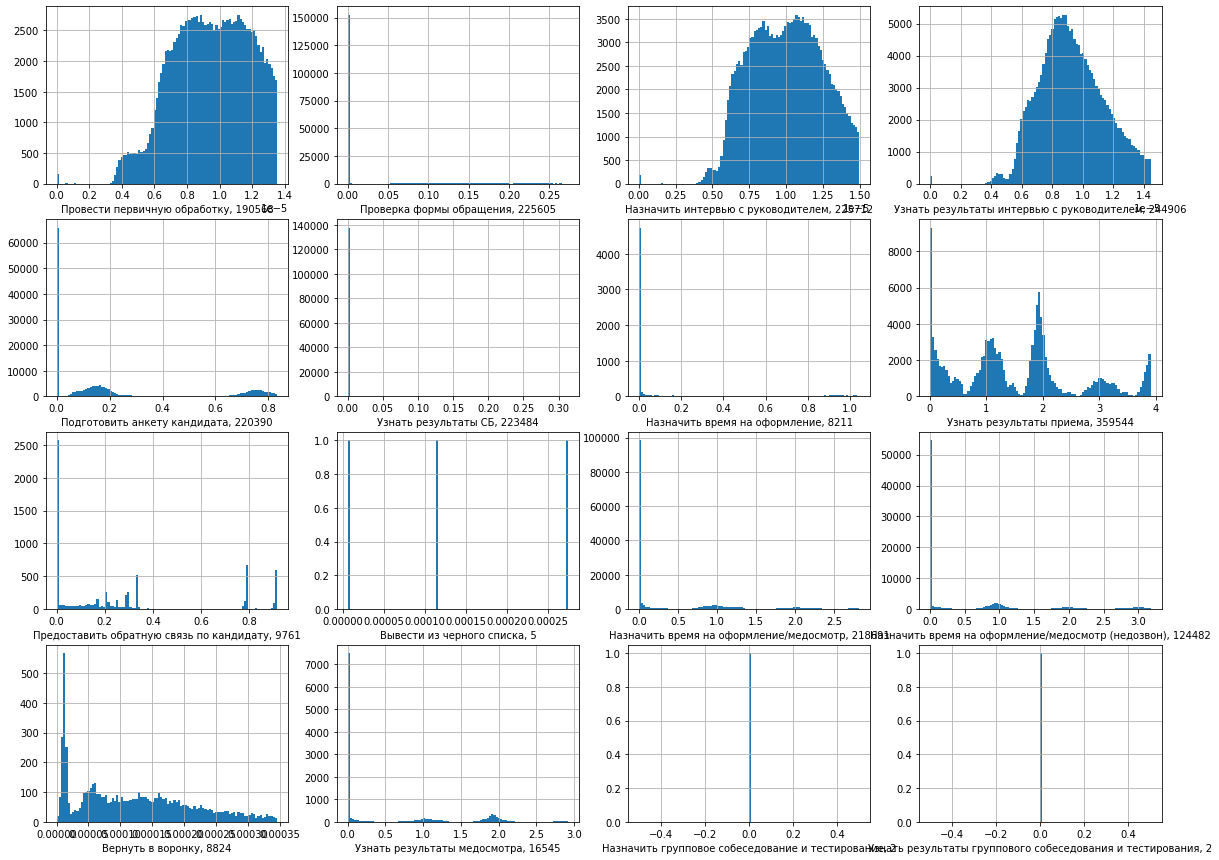

In [238]:
showHist(df_fits, activities_g, 'activity_name', activity_threshold, True)

In [ ]:
showHist(df_fits, results_g, 'result_name', result_threshold, True, 6)

# Замечание! 
заменить float значения колонки next_id на int

In [14]:
#df2020["next_id"] = df2020["next_id"].astype(int) # пишет что не может NaN сконвертить в инт, тут надо подумать

In [31]:
по stage_name других годов

array(['Создание кандидата', 'СБ', 'Обработка',
       'Назначение времени на оформление/медосмотр',
       'Интервью с руководителем', 'Оформление', 'Смена вакансии',
       'Отказался', 'Ожидание', 'Резерв', 'Не прошел СБ', 'Мы отказали',
       'Выход на работу', 'Кадровый резерв', 'Черный список',
       'Гайд-интервью', 'Групповое собеседование и тестирование',
       'Выход состоялся'], dtype=object)

In [34]:
по stage_name 2020

array(['Создание кандидата', 'Интервью с руководителем', 'Обработка',
       'Оформление', 'Смена вакансии', 'СБ', 'Не прошел СБ', 'Отказался',
       'Мы отказали', 'Резерв', 'Выход на работу', 'Черный список'],
      dtype=object)